In [134]:
import scipy.io 
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import seaborn as sns

In [226]:
data = scipy.io.loadmat('../data/002_synched.mat', struct_as_record=True)

# Heart Watch Monitor Data

In [227]:
HW = data['data']['HW'][0][0]
HW_gain = HW['AGC'][0][0]
HW_ECG = HW['ECG'][0][0]
date_time = data['data']['date_time']

In [232]:
raw_norm = HW_ECG['raw_normalized'][0][0][:,0] 
non_usable = HW_ECG['non_usable'][0][0][:,0]
hw = raw_norm[non_usable==0]

In [233]:
#normalize
hw = (hw - hw.mean()) / hw.std() 

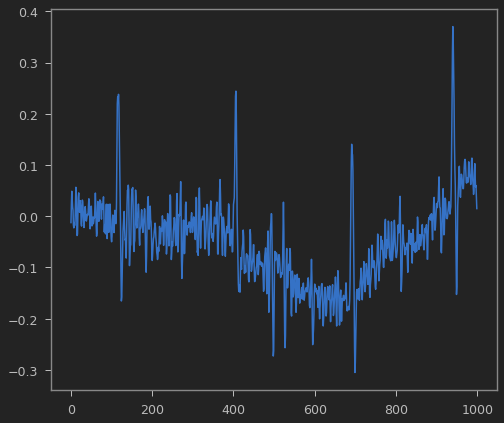

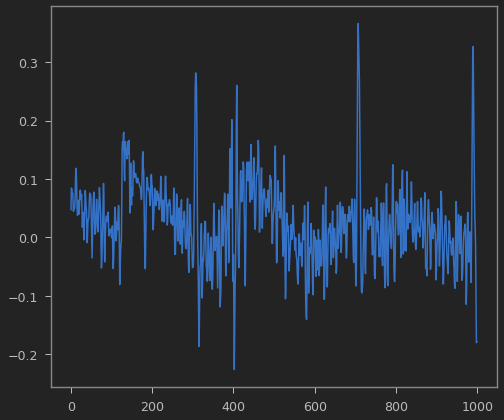

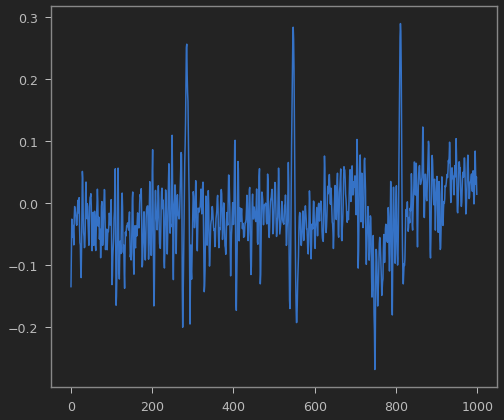

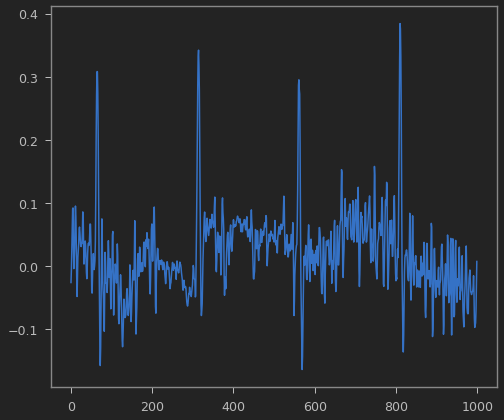

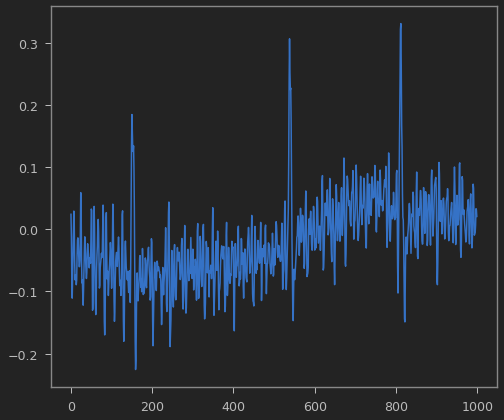

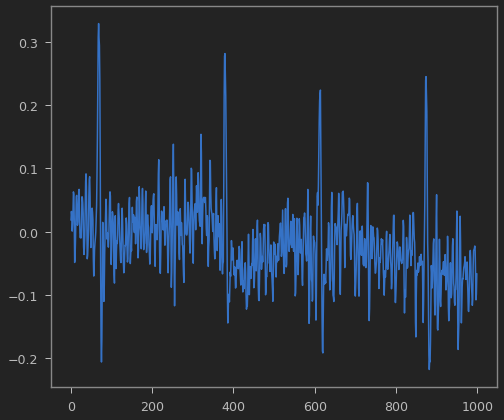

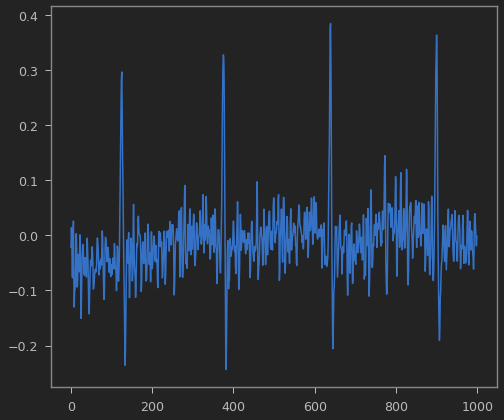

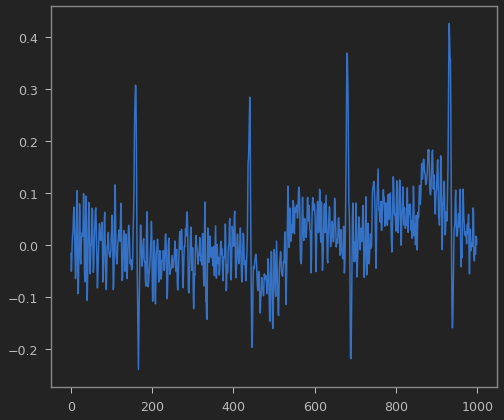

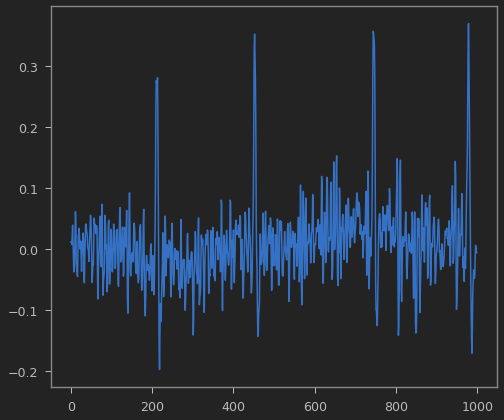

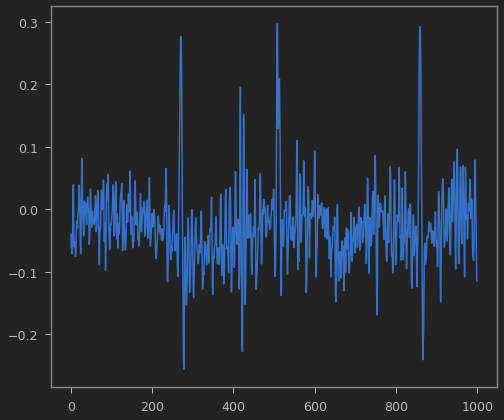

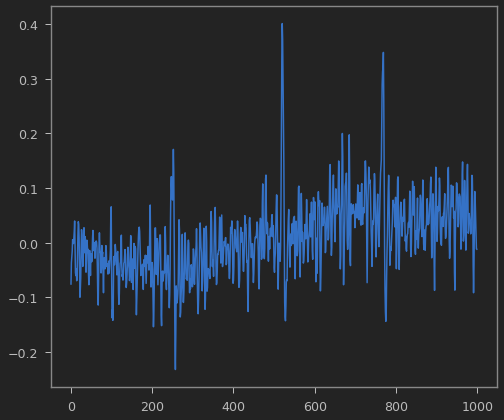

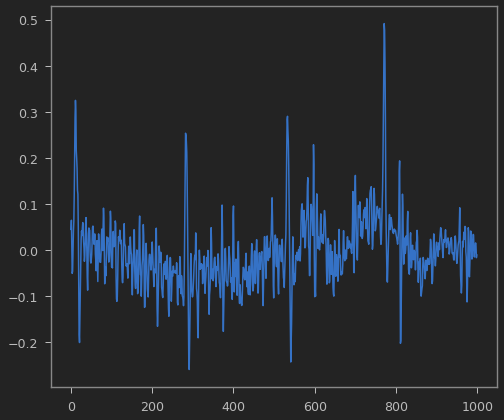

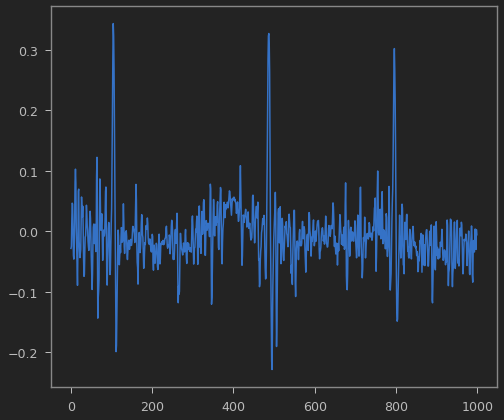

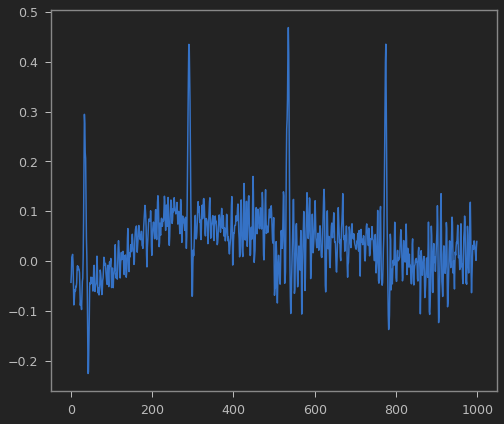

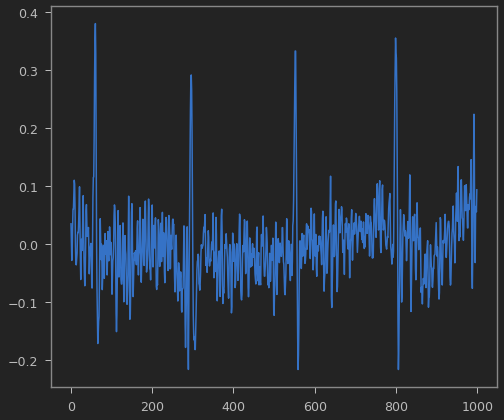

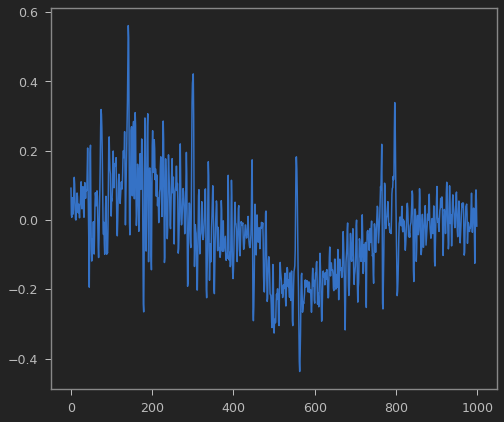

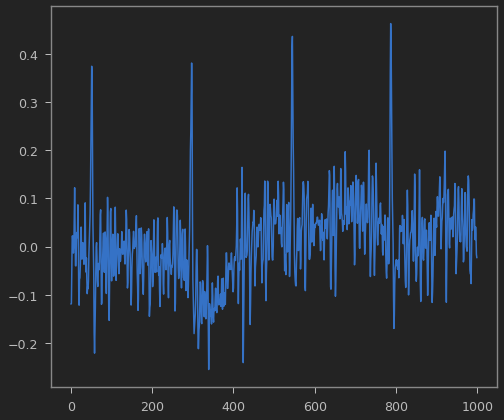

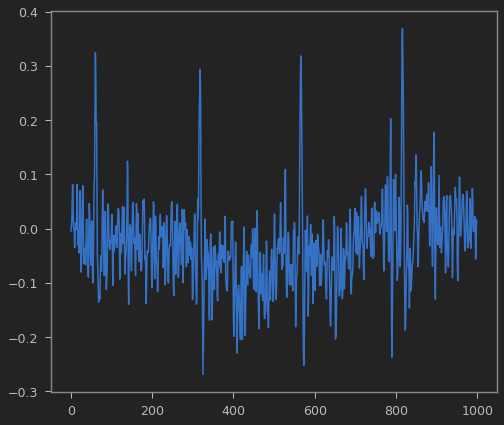

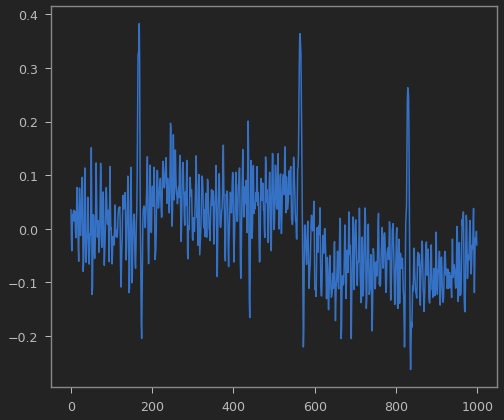

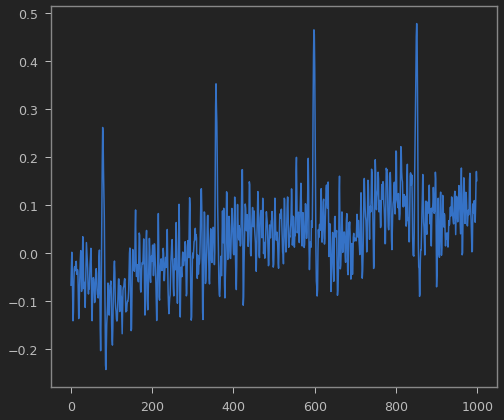

In [234]:
for idx in range(20):
    plt.figure()
    plt.plot(hw[idx*1000:(idx+1)*1000])
    plt.show()

# Holter Monitor Data

In [251]:
HM = data['data']['HM']# raw data

In [252]:
hm = HM[0][0][0][0][1][non_usable==0]

In [253]:
#normalize
hm = (hm - hm.mean(axis=0)) / hm.std(axis=0)

# Comparing synchronized HW and HM data

In [257]:
idx = 100
hm_channel = 2

<ipython-input-266-51b92ac78b28>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


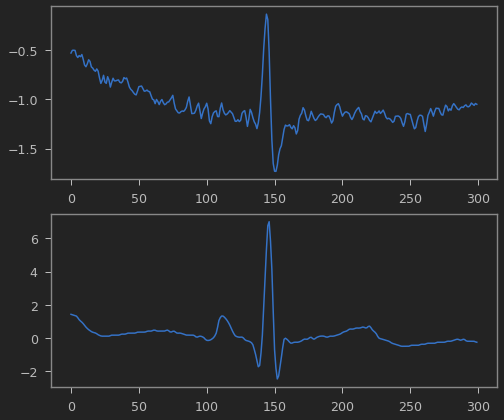

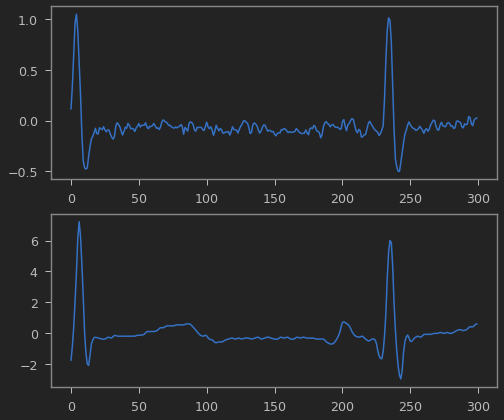

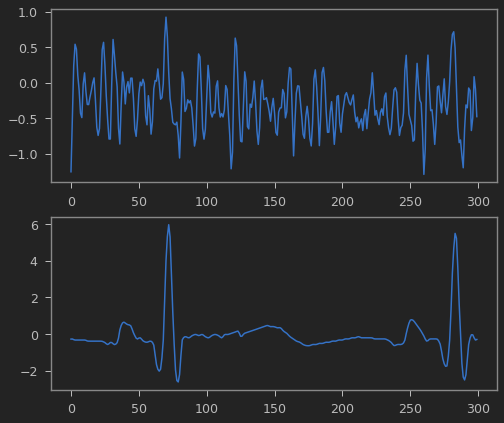

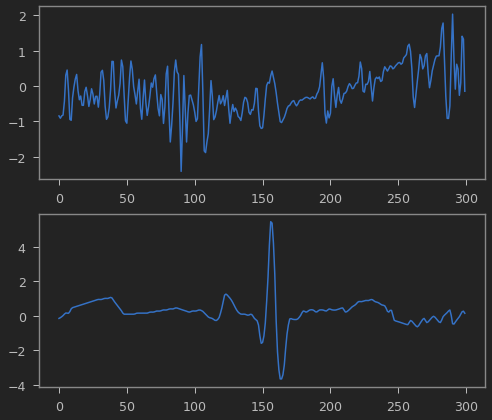

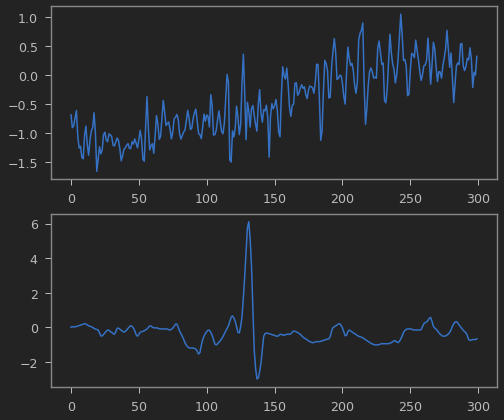

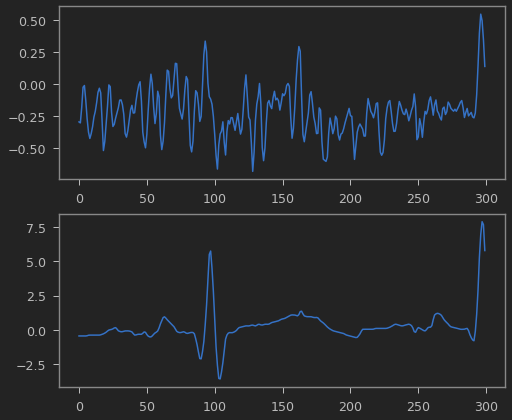

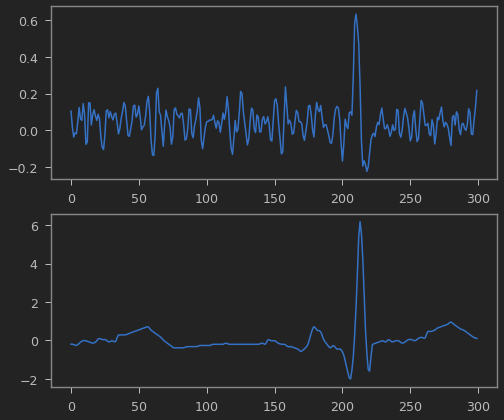

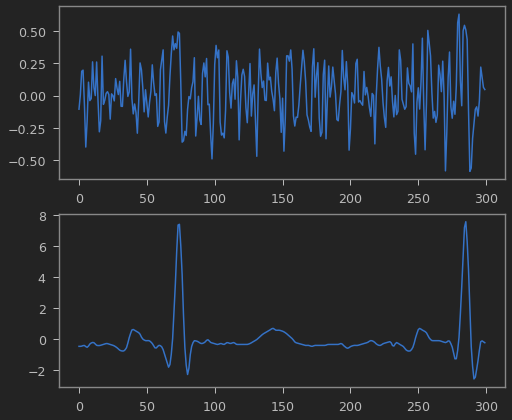

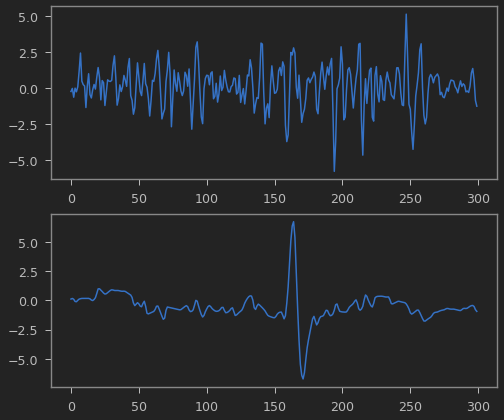

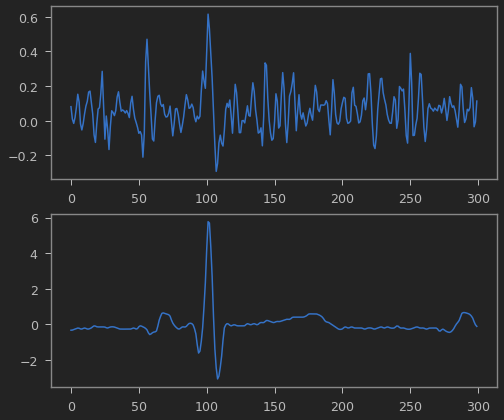

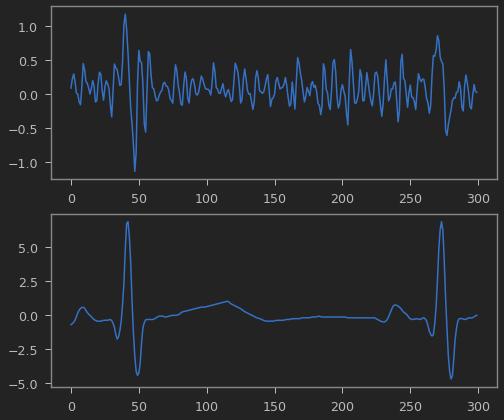

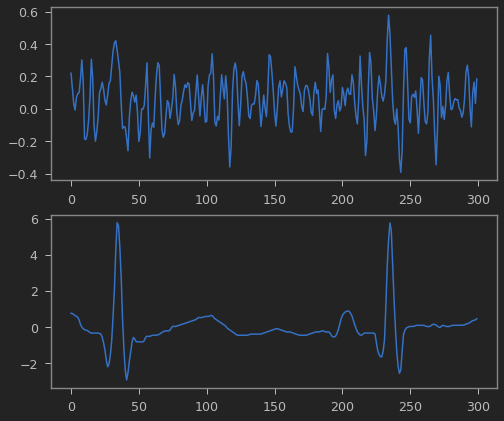

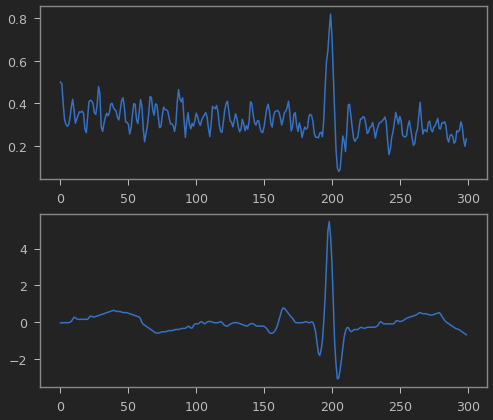

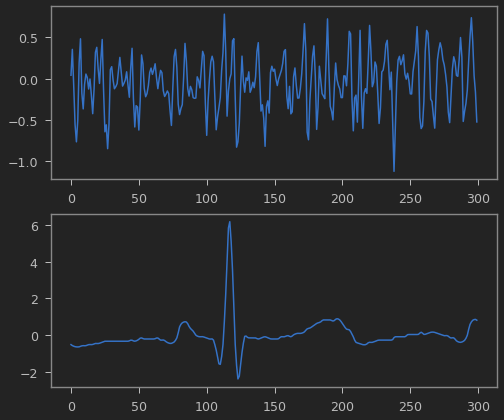

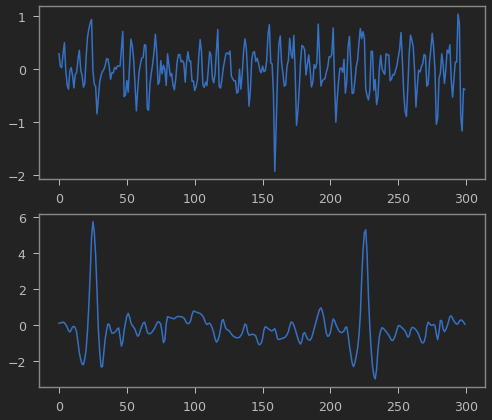

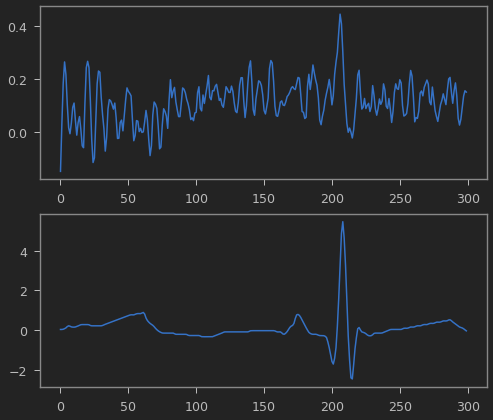

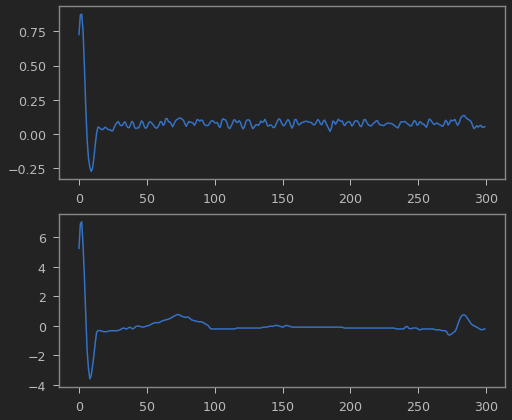

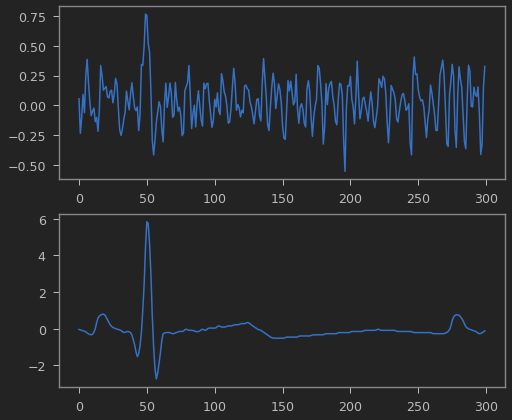

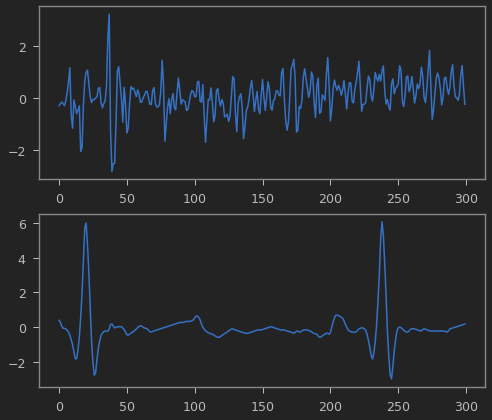

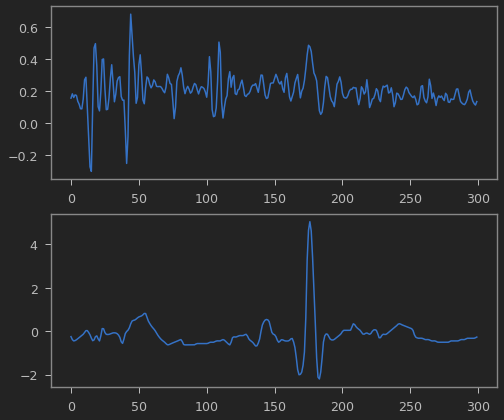

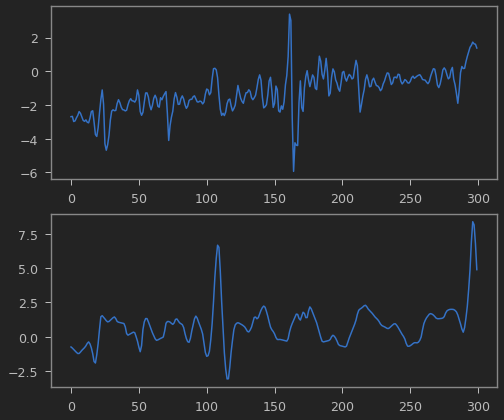

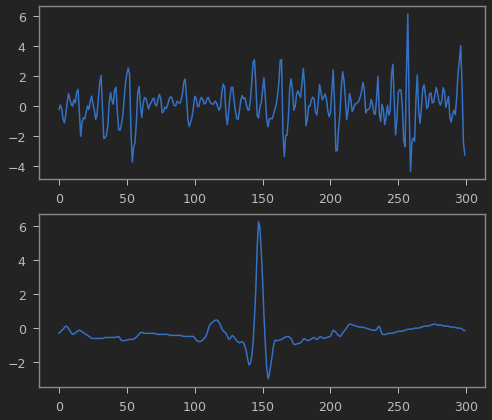

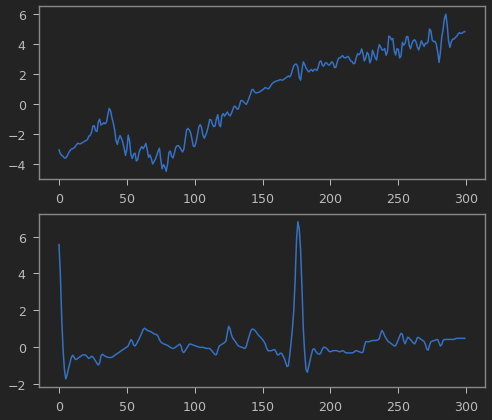

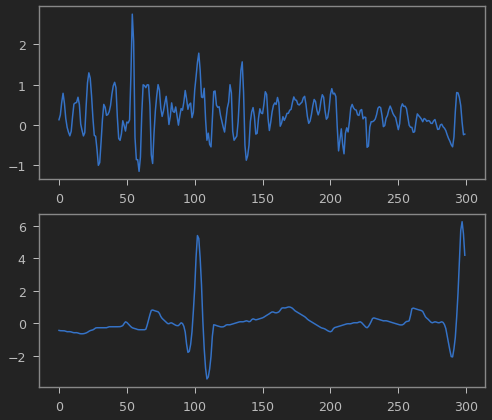

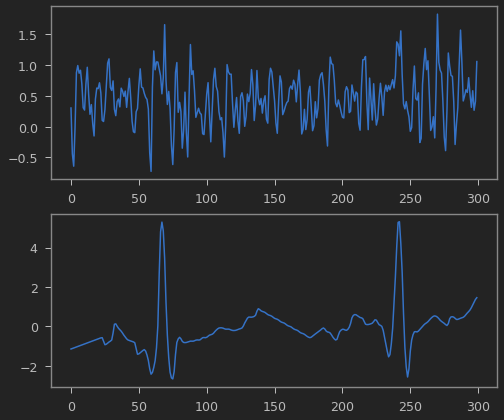

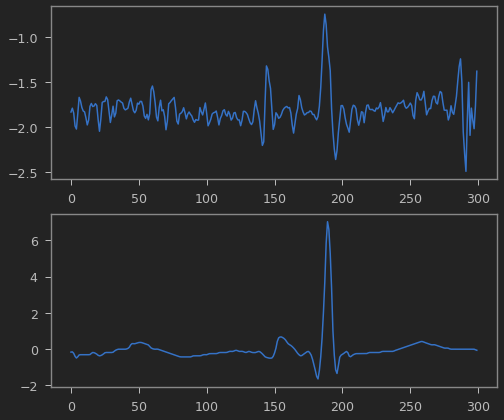

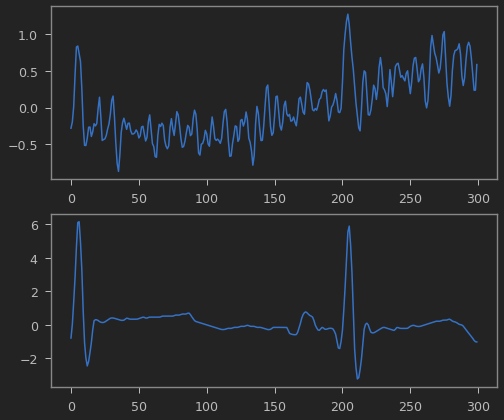

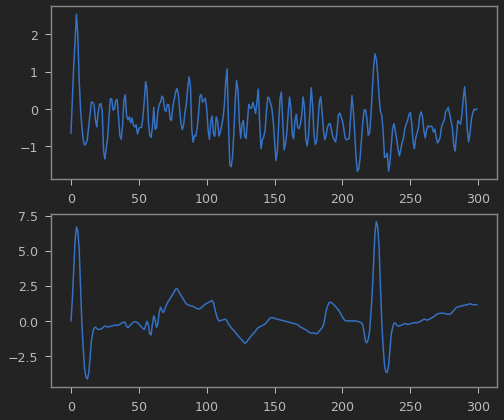

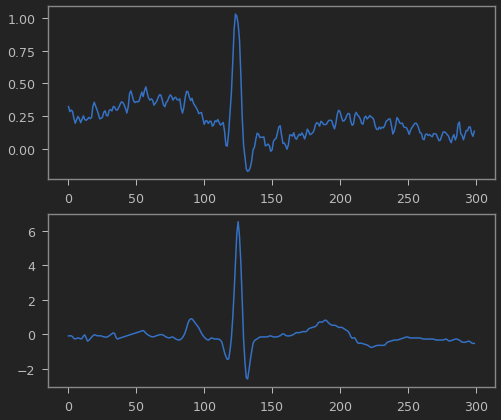

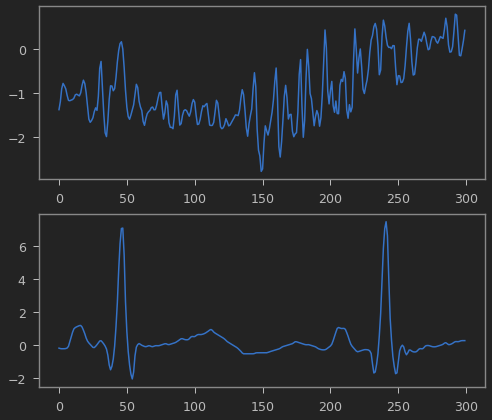

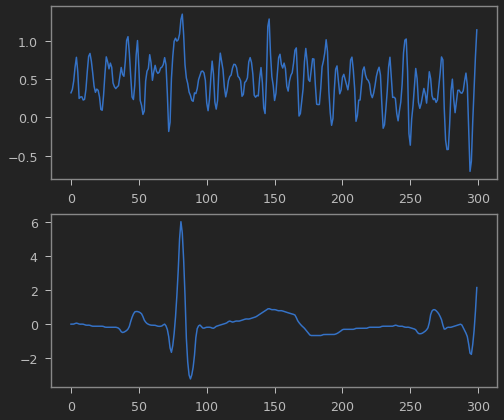

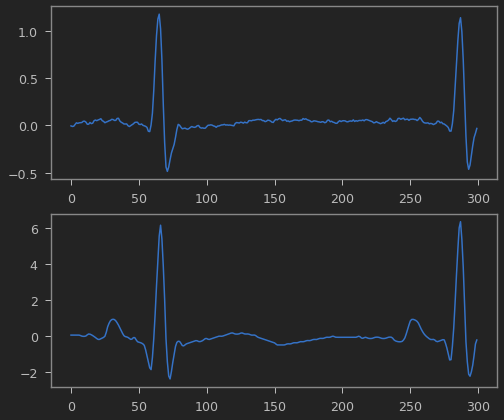

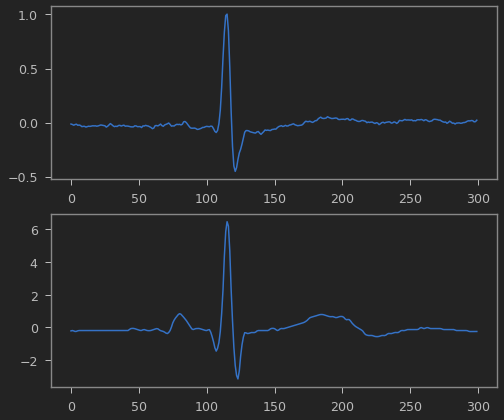

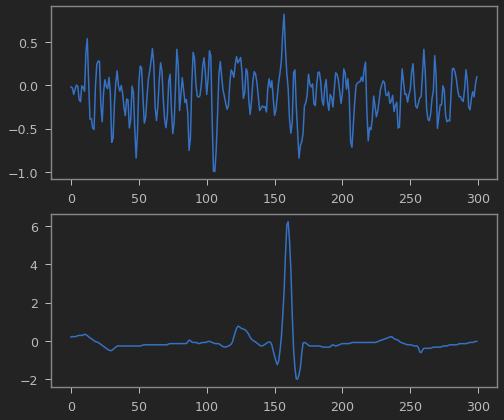

In [266]:
for idx in np.arange(10000,20000,300):
    plt.figure()
    plt.subplot(211)
    plt.plot(hw[idx*300:(idx+1)*300])
    plt.subplot(212)
    plt.plot(hm[idx*300:(idx+1)*300, 2])

# Compute correlation between HW and 3 lead HM

          0         1         2         3
0  1.000000  0.062281 -0.049063  0.057775
1  0.062281  1.000000 -0.838866  0.816863
2 -0.049063 -0.838866  1.000000 -0.668320
3  0.057775  0.816863 -0.668320  1.000000
          0         1         2         3
0  1.000000  0.153074 -0.140525  0.124705
1  0.153074  1.000000 -0.838881  0.767233
2 -0.140525 -0.838881  1.000000 -0.647066
3  0.124705  0.767233 -0.647066  1.000000
          0         1         2         3
0  1.000000  0.053855 -0.044470  0.047571
1  0.053855  1.000000 -0.701882  0.705933
2 -0.044470 -0.701882  1.000000 -0.524990
3  0.047571  0.705933 -0.524990  1.000000
          0         1         2         3
0  1.000000  0.075149 -0.066072  0.078199
1  0.075149  1.000000 -0.719008  0.817883
2 -0.066072 -0.719008  1.000000 -0.597822
3  0.078199  0.817883 -0.597822  1.000000
          0         1         2         3
0  1.000000  0.034841 -0.050467 -0.006917
1  0.034841  1.000000 -0.540194  0.523925
2 -0.050467 -0.540194  1.000000 -0

<ipython-input-250-13c7d3e52390>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(11,9))


          0         1         2         3
0  1.000000  0.032362 -0.015349  0.032472
1  0.032362  1.000000 -0.762925  0.854868
2 -0.015349 -0.762925  1.000000 -0.662975
3  0.032472  0.854868 -0.662975  1.000000
          0         1         2         3
0  1.000000  0.063404 -0.038501  0.057907
1  0.063404  1.000000 -0.798850  0.890698
2 -0.038501 -0.798850  1.000000 -0.726723
3  0.057907  0.890698 -0.726723  1.000000


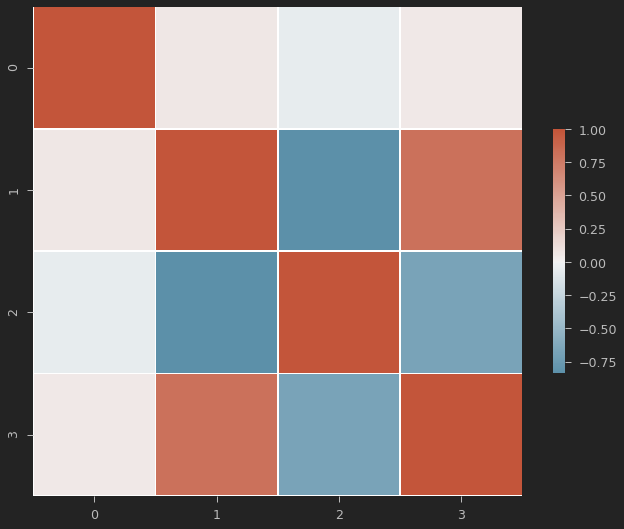

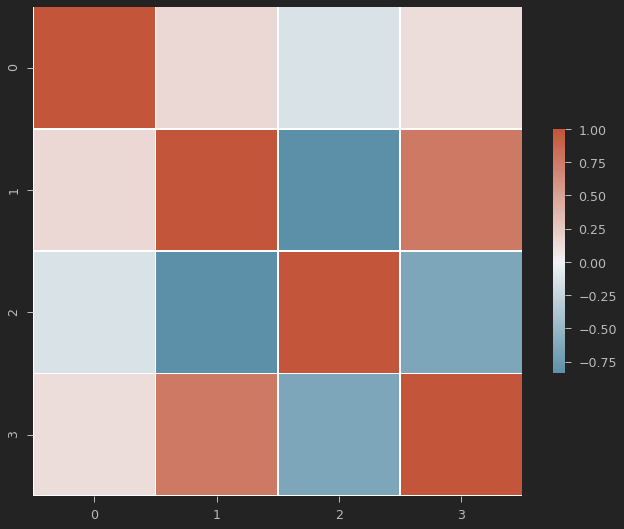

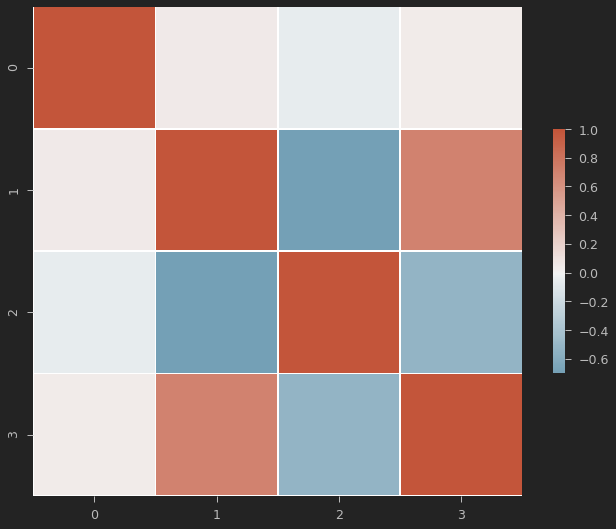

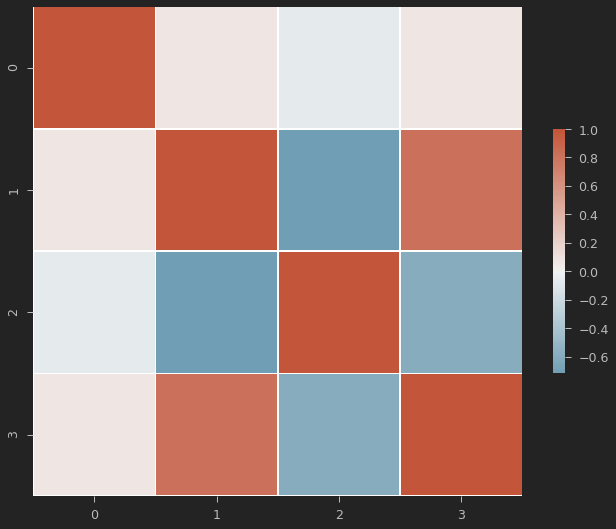

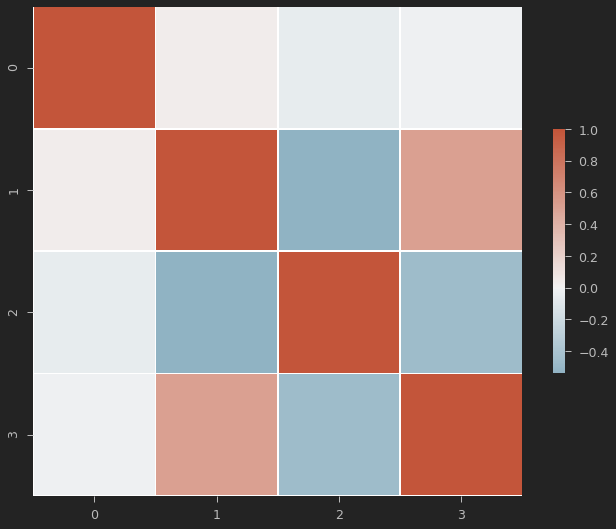

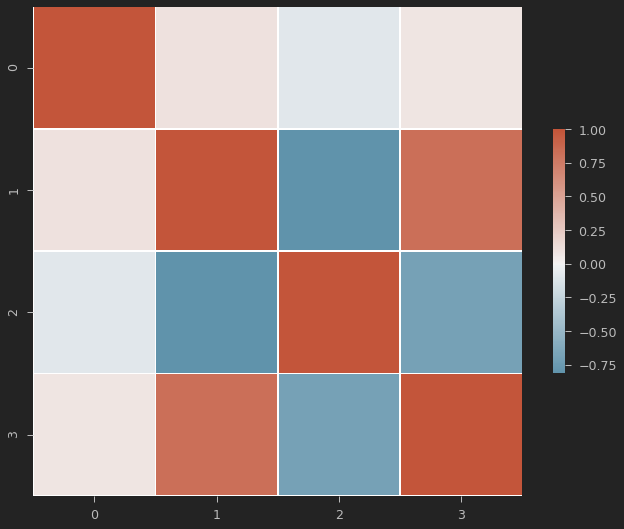

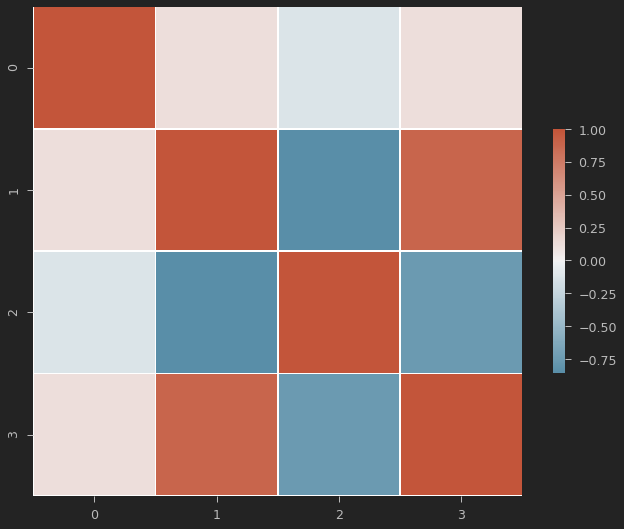

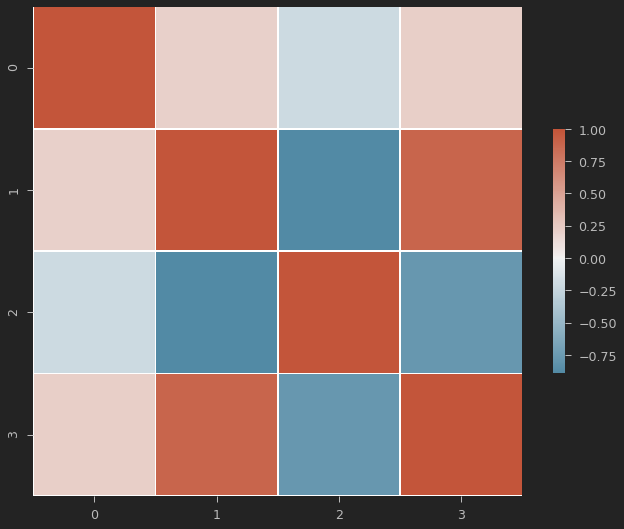

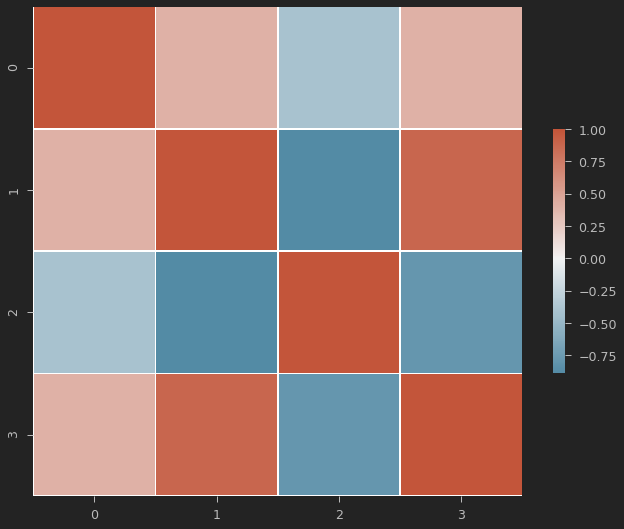

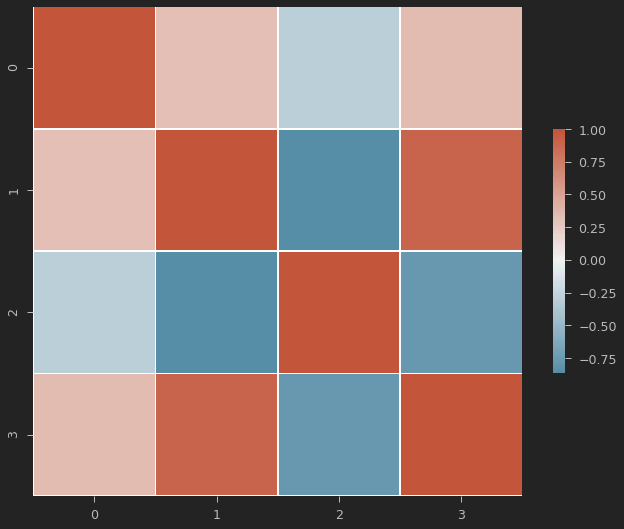

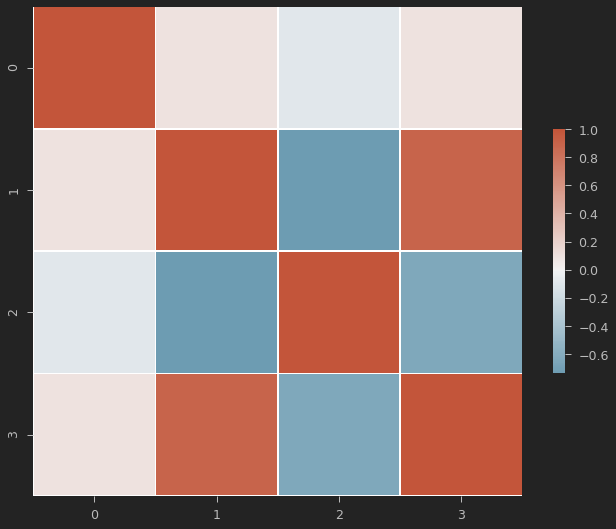

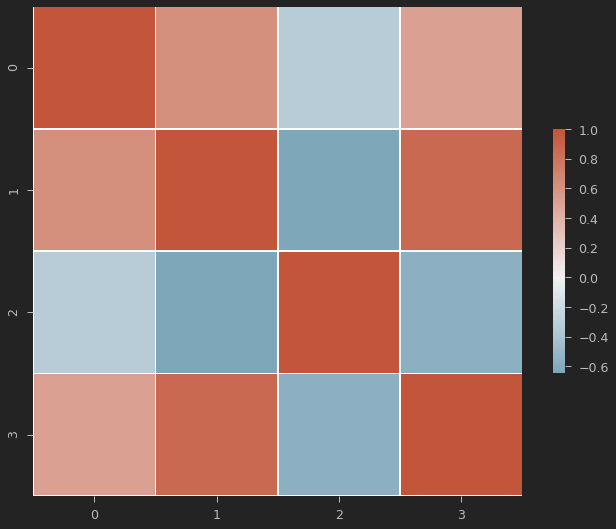

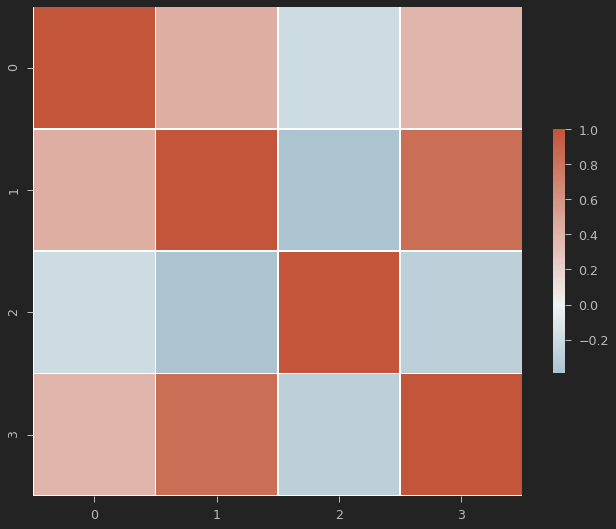

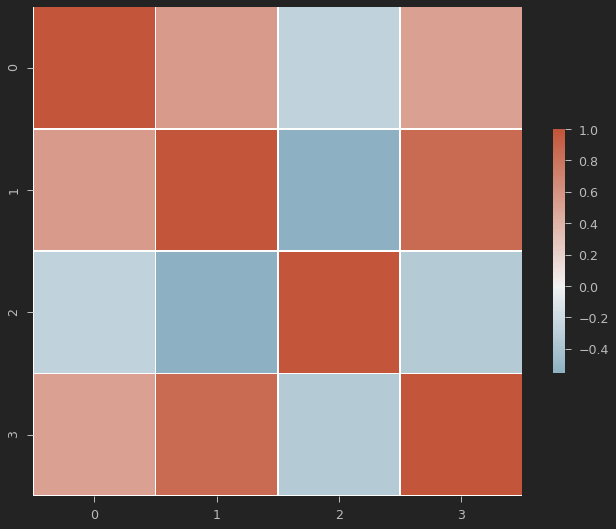

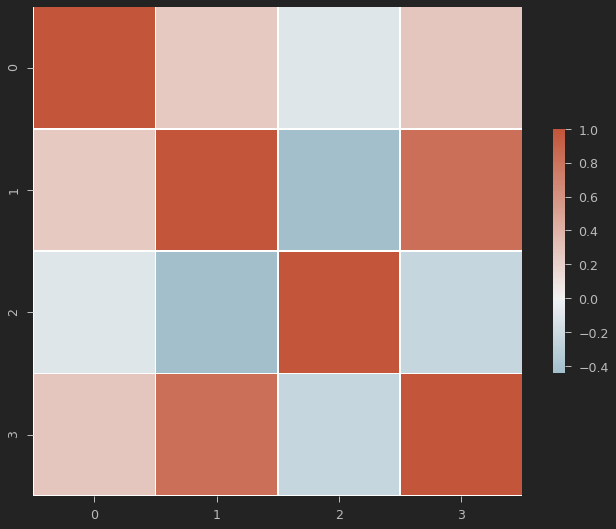

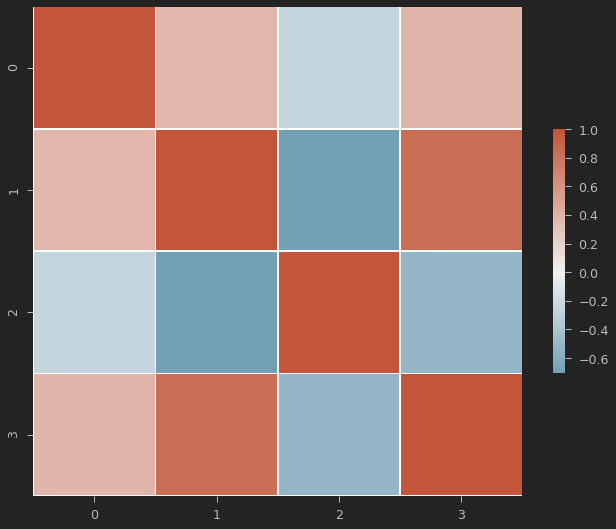

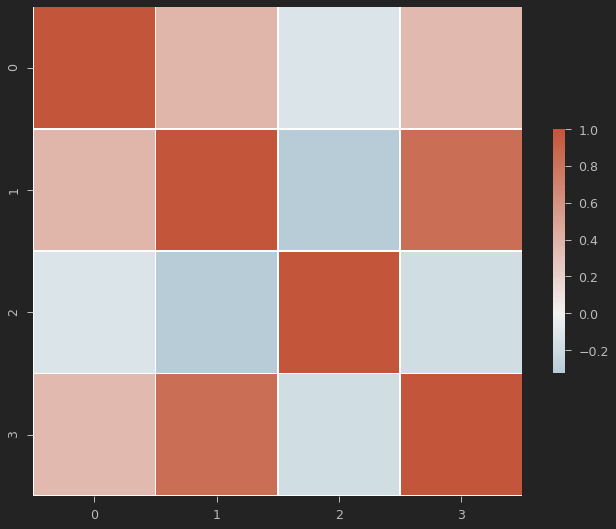

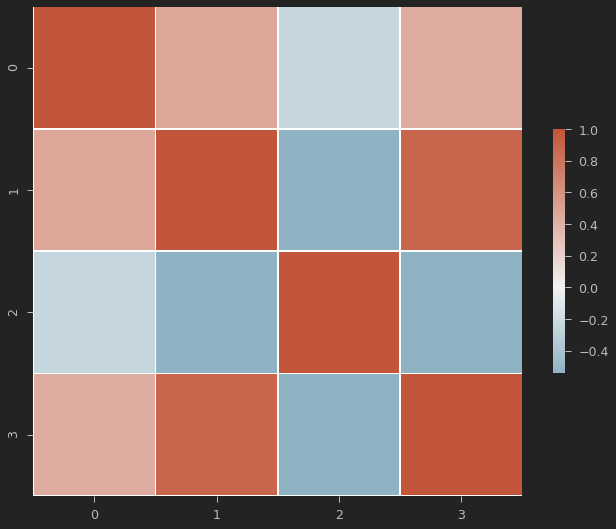

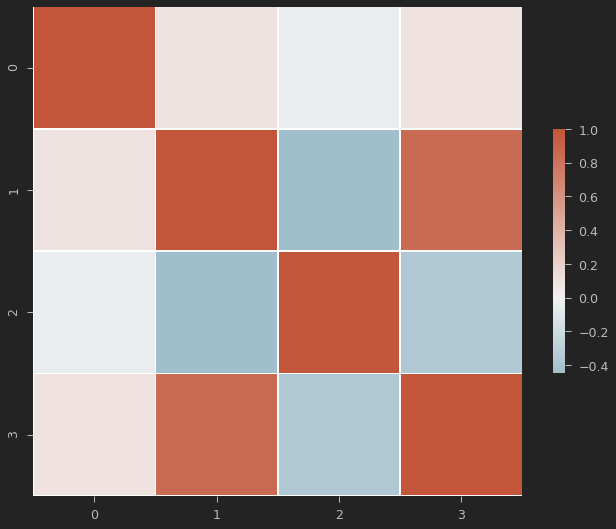

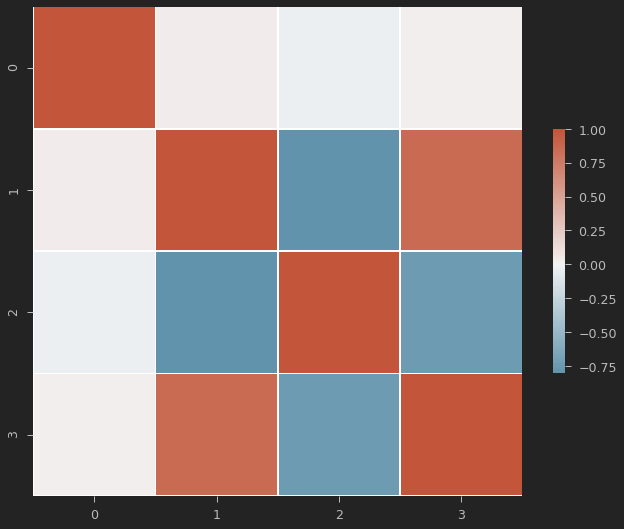

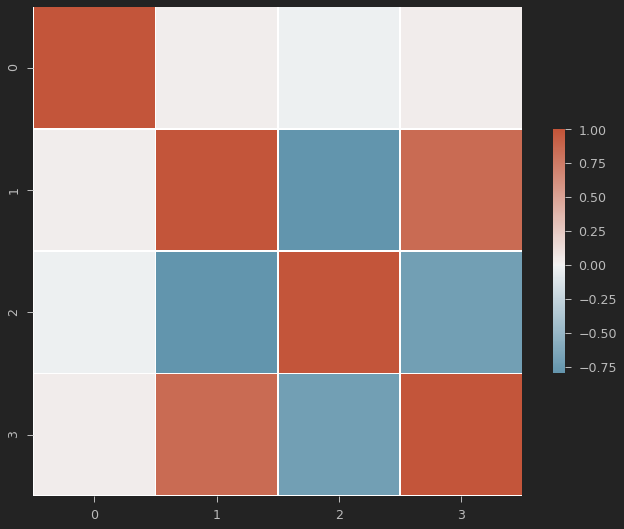

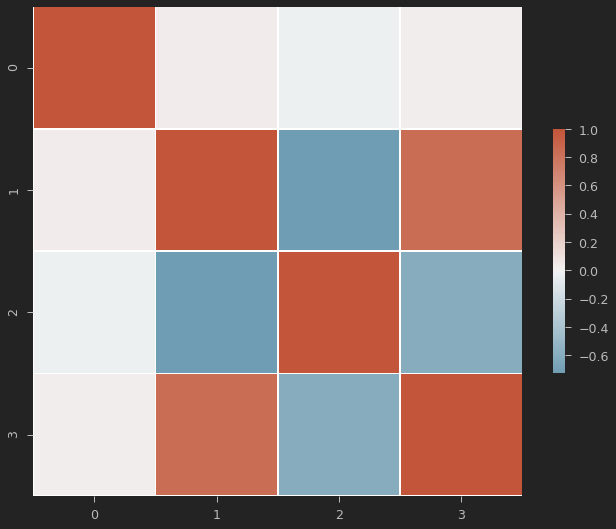

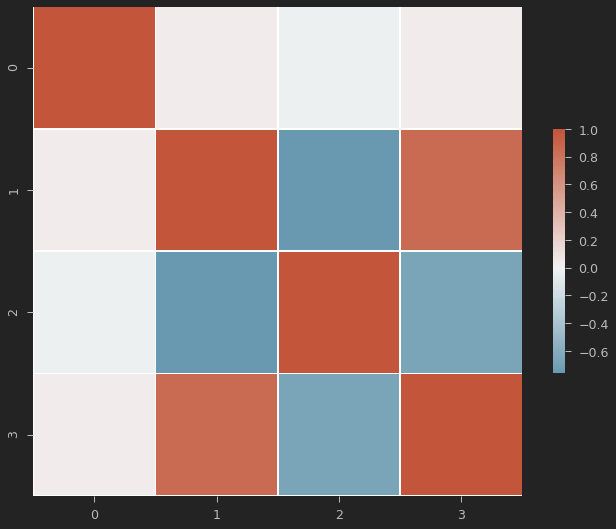

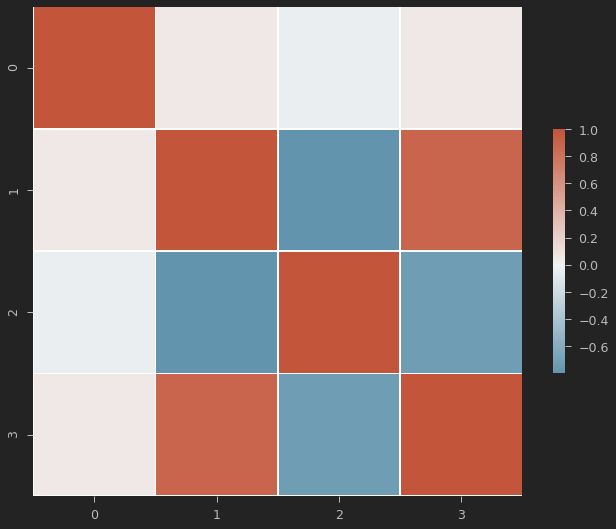

In [250]:
dx = 60 * 60 * 300
for ii in np.arange(0, len(hw), dx):
    df = pd.DataFrame(np.concatenate([hw[ii:ii+dx,np.newaxis],hm[ii:ii+dx]], axis=1))
    corr = df.corr()
    print(corr)
    f, ax = plt.subplots(figsize=(11,9))
    cmap = sns.diverging_palette(230,20, as_cmap=True)
    sns.heatmap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, 
                cbar_kws={"shrink":.5})

In [217]:
df

,0,1,2,3
0,0.027038,0.113983,0.150566,0.134788


In [218]:
np.arange(0, len(hw), 60 * 60 * 300)

array([       0,  1080000,  2160000,  3240000,  4320000,  5400000,
        6480000,  7560000,  8640000,  9720000, 10800000, 11880000,
       12960000, 14040000, 15120000, 16200000, 17280000, 18360000,
       19440000, 20520000, 21600000, 22680000, 23760000, 24840000])

In [209]:
60 * 60

3600

In [195]:
corr = df.corr()

In [196]:
corr

,0,1,2,3
0,1.000000,0.446692,-0.242983,0.423244
1,0.446692,1.000000,-0.724904,0.915017
2,-0.242983,-0.724904,1.000000,-0.528504
3,0.423244,0.915017,-0.528504,1.000000


## Heat Map

<AxesSubplot:>

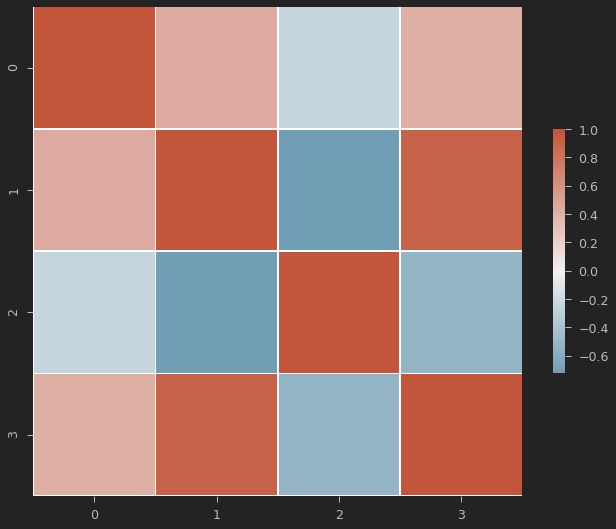

In [198]:
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, 
            cbar_kws={"shrink":.5})

## pair plot